# TAACProject2

## Tasks

### Task 1:  Dataset and Learning Task

The chosen tabular data set is DS1 [Real Estate Listings in Portugal](https://www.kaggle.com/datasets/luvathoms/portugal-real-estate-2024)


In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:

import kagglehub


# Download latest version
path = kagglehub.dataset_download("luvathoms/portugal-real-estate-2024")

print("Path to dataset files:", path)

ConnectionError: HTTPSConnectionPool(host='www.kaggle.com', port=443): Max retries exceeded with url: /api/v1/datasets/view/luvathoms/portugal-real-estate-2024 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001F5DCCAD610>: Failed to resolve 'www.kaggle.com' ([Errno 11001] getaddrinfo failed)"))

In [ ]:
import pandas as pd

df = pd.read_csv(path+'\portugal_listinigs.csv')

### Inspecting the Dataset

In [ ]:
df.head()

,Price,District,City,Town,Type,EnergyCertificate,GrossArea,TotalArea,Parking,HasParking,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,780000.0,Vila Real,Valpaços,Carrazedo de Montenegro e Curros,Farm,NC,200.0,552450.0,0.0,False,...,False,NaN,NaN,NaN,NaN,NaN,120.0,NaN,NaN,0.0
1,223000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,81.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,81.0,NaN,NaN,2.0
2,228000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,108.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,108.0,NaN,NaN,2.0
3,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,114.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,0.0
4,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,114.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0


In [ ]:
# check number of observations and features
df.shape    

(122223, 25)

In [ ]:
# data types
df.dtypes

Price                    float64
District                  object
City                      object
Town                      object
Type                      object
EnergyCertificate         object
GrossArea                float64
TotalArea                float64
Parking                  float64
HasParking                object
Floor                     object
ConstructionYear         float64
EnergyEfficiencyLevel     object
PublishDate               object
Garage                    object
Elevator                  object
ElectricCarsCharging      object
TotalRooms               float64
NumberOfBedrooms         float64
NumberOfWC               float64
ConservationStatus        object
LivingArea               float64
LotSize                  float64
BuiltArea                float64
NumberOfBathrooms        float64
dtype: object

<Axes: >

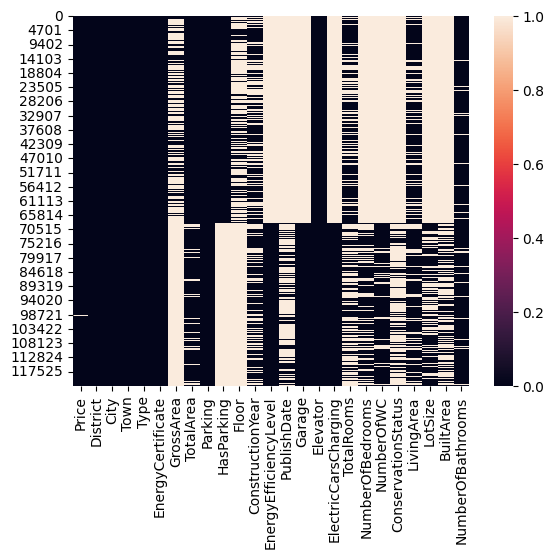

In [ ]:
import seaborn as sns
sns.heatmap(df.isna())

In [ ]:
df.duplicated().sum()

np.int64(7188)

In [ ]:
df.drop_duplicates(inplace=True, keep='first')

In [ ]:
# Dataframe summary

def summary(df):
    #print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
Price,float64,267,0.002321,0,4474,114768,1.0,1380000000.0,370021.551309,4123539.066734,780000.0,223000.0,228000.0
District,object,0,0.000000,0,25,115035,NaN,NaN,NaN,NaN,Vila Real,Faro,Faro
City,object,0,0.000000,0,272,115035,NaN,NaN,NaN,NaN,Valpaços,São Brás de Alportel,São Brás de Alportel
Town,object,2,0.000017,0,2246,115033,NaN,NaN,NaN,NaN,Carrazedo de Montenegro e Curros,São Brás de Alportel,São Brás de Alportel
Type,object,15,0.000130,0,21,115020,NaN,NaN,NaN,NaN,Farm,Apartment,Apartment
EnergyCertificate,object,13,0.000113,0,12,115022,NaN,NaN,NaN,NaN,NC,A+,A+
GrossArea,float64,89021,0.773860,0,2267,26014,-7.0,12750000.0,2927.940647,118909.259565,200.0,NaN,NaN
TotalArea,float64,6834,0.059408,0,7214,108201,-7196067.0,61420071105.0,603655.699855,186774276.614159,552450.0,81.0,108.0
Parking,float64,146,0.001269,0,4,114889,0.0,3.0,0.560985,0.864944,0.0,1.0,1.0
HasParking,object,51153,0.444673,0,2,63882,NaN,NaN,NaN,NaN,False,True,True


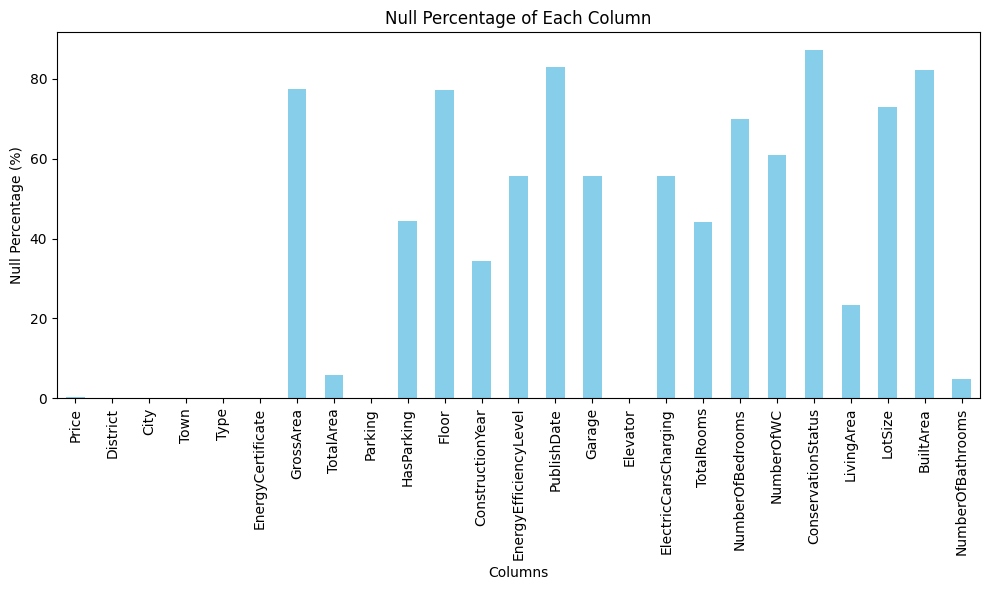

In [ ]:
import matplotlib.pyplot as plt
null_percentage = df.isnull().mean() * 100

# Plot the null percentage as a bar chart
plt.figure(figsize=(10, 6))
null_percentage.plot(kind='bar', color='skyblue')
plt.title('Null Percentage of Each Column')
plt.xlabel('Columns')
plt.ylabel('Null Percentage (%)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# to test ydata_profiling whith a smaller data set
df.drop(["Floor", "GrossArea", "PublishDate", "Garage", "ElectricCarsCharging", "NumberOfBedrooms", "NumberOfWC", "ConservationStatus", "LotSize", "BuiltArea","HasParking","EnergyEfficiencyLevel"], axis=1, inplace=True)
df.dropna(subset=['Price'],inplace=True)



In [ ]:
df2= df[df["NumberOfBathrooms"]>0]
df2= df2[df2["TotalArea"]>0].reset_index(drop=True)

In [ ]:
summary(df2)

,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
Price,float64,0,0.000000,2304,3532,71863,1.0,1380000000.0,433623.493354,5176029.951735,223000.0,228000.0,250000.0
District,object,0,0.000000,2304,25,71863,NaN,NaN,NaN,NaN,Faro,Faro,Faro
City,object,0,0.000000,2304,268,71863,NaN,NaN,NaN,NaN,São Brás de Alportel,São Brás de Alportel,São Brás de Alportel
Town,object,0,0.000000,2304,2060,71863,NaN,NaN,NaN,NaN,São Brás de Alportel,São Brás de Alportel,São Brás de Alportel
Type,object,2,0.000028,2304,21,71861,NaN,NaN,NaN,NaN,Apartment,Apartment,Apartment
EnergyCertificate,object,0,0.000000,2304,11,71863,NaN,NaN,NaN,NaN,A+,A+,A+
TotalArea,float64,0,0.000000,2304,3484,71863,1.0,100000000.0,8819.215452,667799.808289,81.0,108.0,114.0
Parking,float64,81,0.001127,2304,4,71782,0.0,3.0,0.773941,0.918995,1.0,1.0,1.0
ConstructionYear,float64,10814,0.150481,2304,121,61049,1900.0,2024.0,1990.890383,25.329213,NaN,NaN,NaN
Elevator,object,0,0.000000,2304,2,71863,NaN,NaN,NaN,NaN,True,True,True


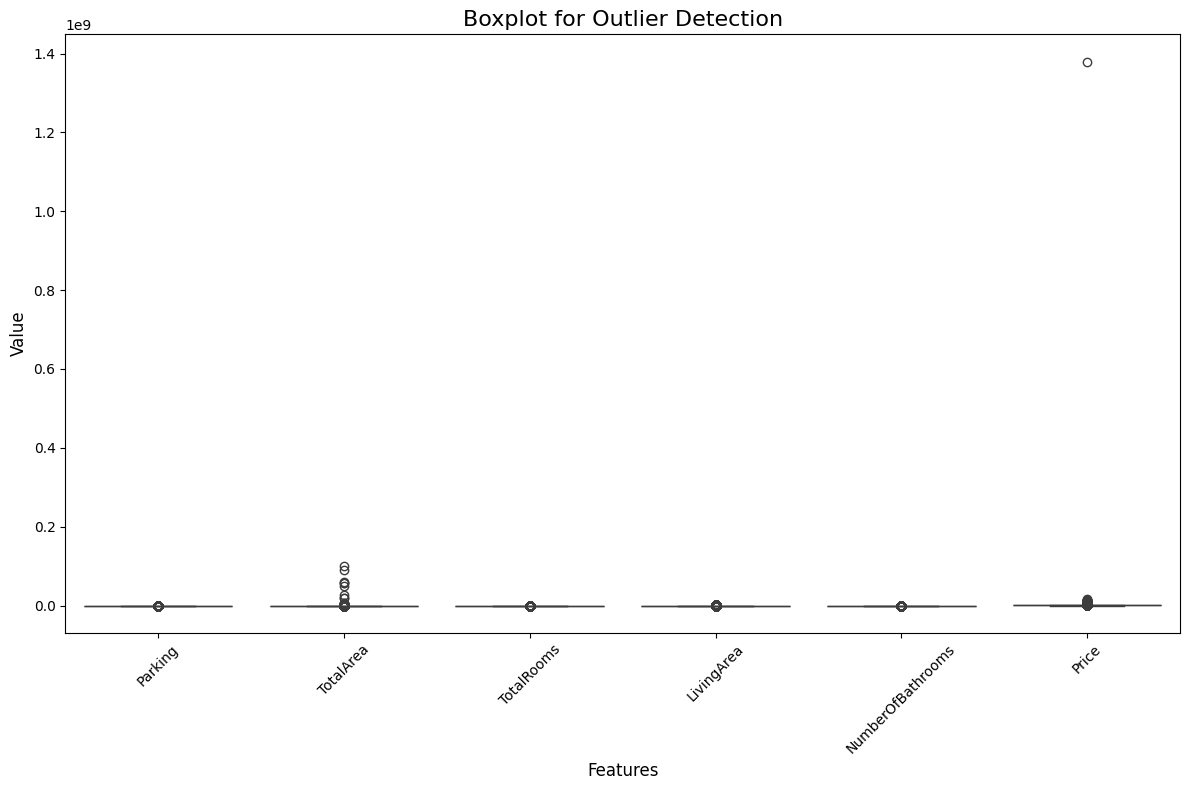

In [ ]:
# Set the figure size
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

numerical_columns= [ 'Parking','TotalArea', 'TotalRooms', 'LivingArea', 'NumberOfBathrooms','Price']
# Create a boxplot for each numerical column
sns.boxplot(data=df2[numerical_columns])

# Add title and labels
plt.title("Boxplot for Outlier Detection", fontsize=16)
plt.xticks(rotation=45)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Value", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

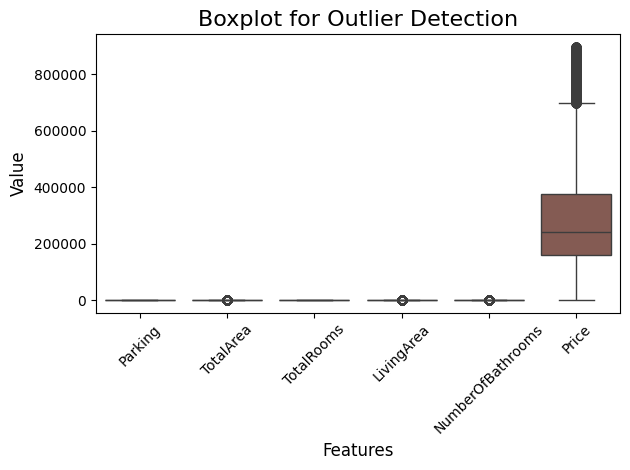

In [ ]:
def remove_outliers(df, numerical_columns):
    Q1 = df[numerical_columns].quantile(0.25)
    Q3 = df[numerical_columns].quantile(0.75)
    IQR = Q3 - Q1
    
    # Filter out outliers by removing rows that have any value outside of the IQR range
    df_cleaned = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_cleaned

# Remove outliers
df_cleaned = remove_outliers(df2, numerical_columns)
# Create a boxplot for each numerical column
sns.boxplot(data=df_cleaned[numerical_columns])

# Add title and labels
plt.title("Boxplot for Outlier Detection", fontsize=16)
plt.xticks(rotation=45)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Value", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import matplotlib.pyplot as plt

categorical_columns = df_cleaned.select_dtypes(include=['object']).columns.tolist()
encoder = LabelEncoder()

# Apply one-hot encoding to the categorical columns
for i in categorical_columns:
    one_hot_encoded = encoder.fit_transform(df_cleaned[i])
    df_cleaned[i]= one_hot_encoded



In [ ]:
summary(df_cleaned)

,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
Price,float64,0,0.000000,1927,2765,54318,1.0,896500.0,283840.169818,184340.499490,223000.0,228000.0,250000.0
District,int32,0,0.000000,1927,24,54318,0.0,23.0,12.882912,6.267681,6.0,6.0,6.0
City,int32,0,0.000000,1927,265,54318,0.0,264.0,134.174933,72.944713,216.0,216.0,216.0
Town,int32,0,0.000000,1927,1939,54318,0.0,1938.0,899.650411,555.130101,1585.0,1585.0,1585.0
Type,int32,0,0.000000,1927,19,54318,0.0,18.0,2.901451,4.179976,0.0,0.0,0.0
EnergyCertificate,int32,0,0.000000,1927,11,54318,0.0,10.0,5.065890,2.774464,1.0,1.0,1.0
TotalArea,float64,0,0.000000,1927,488,54318,1.0,491.0,129.080968,79.680729,81.0,108.0,114.0
Parking,float64,30,0.000552,1927,3,54288,0.0,2.0,0.544872,0.655734,1.0,1.0,1.0
ConstructionYear,float64,8143,0.149913,1927,120,46175,1900.0,2024.0,1990.839632,24.800533,NaN,NaN,NaN
Elevator,int32,0,0.000000,1927,2,54318,0.0,1.0,0.402611,0.490428,1.0,1.0,1.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

num_columns = df_cleaned.drop(['Price'],axis=1).select_dtypes(include=['float64']).columns.tolist()


df_cleaned= df_cleaned.apply(lambda x: x.fillna(x.mode()[0]), axis=0)
scaler = MinMaxScaler()
scaler.fit(df_cleaned[num_columns].to_numpy())
df_cleaned[num_columns] = scaler.transform(df_cleaned[num_columns].to_numpy())
df_cleaned


,Price,District,City,Town,Type,EnergyCertificate,TotalArea,Parking,ConstructionYear,Elevator,TotalRooms,LivingArea,NumberOfBathrooms
0,223000.0,6,216,1585,0,1,0.163265,0.5,0.991935,1,0.285714,0.258786,0.2
1,228000.0,6,216,1585,0,1,0.218367,0.5,0.991935,1,0.285714,0.345048,0.2
2,250000.0,6,216,1585,0,1,0.230612,0.5,0.991935,1,0.285714,0.364217,0.2
3,250000.0,6,216,1585,0,1,0.232653,0.5,0.991935,1,0.285714,0.367412,0.2
4,9500.0,6,4,45,0,9,0.053061,0.0,0.725806,1,0.000000,0.086262,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71858,159000.0,19,131,94,0,4,0.169388,0.0,0.709677,0,0.428571,0.268371,0.0
71859,140000.0,20,175,1755,0,6,0.144898,0.0,0.733871,0,0.285714,0.230032,0.0
71860,130000.0,21,69,908,0,9,0.130612,0.0,0.709677,0,0.428571,0.207668,0.0
71861,130000.0,21,69,1440,0,6,0.108163,0.0,0.790323,1,0.714286,0.172524,0.0


In [ ]:
summary(df_cleaned)

,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
Price,float64,0,0.0,2623,2765,54318,1.0,896500.0,283840.169818,184340.499490,223000.000000,228000.000000,250000.000000
District,int32,0,0.0,2623,24,54318,0.0,23.0,12.882912,6.267681,6.000000,6.000000,6.000000
City,int32,0,0.0,2623,265,54318,0.0,264.0,134.174933,72.944713,216.000000,216.000000,216.000000
Town,int32,0,0.0,2623,1939,54318,0.0,1938.0,899.650411,555.130101,1585.000000,1585.000000,1585.000000
Type,int32,0,0.0,2623,19,54318,0.0,18.0,2.901451,4.179976,0.000000,0.000000,0.000000
EnergyCertificate,int32,0,0.0,2623,11,54318,0.0,10.0,5.065890,2.774464,1.000000,1.000000,1.000000
TotalArea,float64,0,0.0,2623,488,54318,0.0,1.0,0.261390,0.162614,0.163265,0.218367,0.230612
Parking,float64,0,0.0,2623,3,54318,0.0,1.0,0.272285,0.327839,0.500000,0.500000,0.500000
ConstructionYear,float64,0,0.0,2623,120,54318,0.0,1.0,0.771459,0.206343,0.991935,0.991935,0.991935
Elevator,int32,0,0.0,2623,2,54318,0.0,1.0,0.402611,0.490428,1.000000,1.000000,1.000000


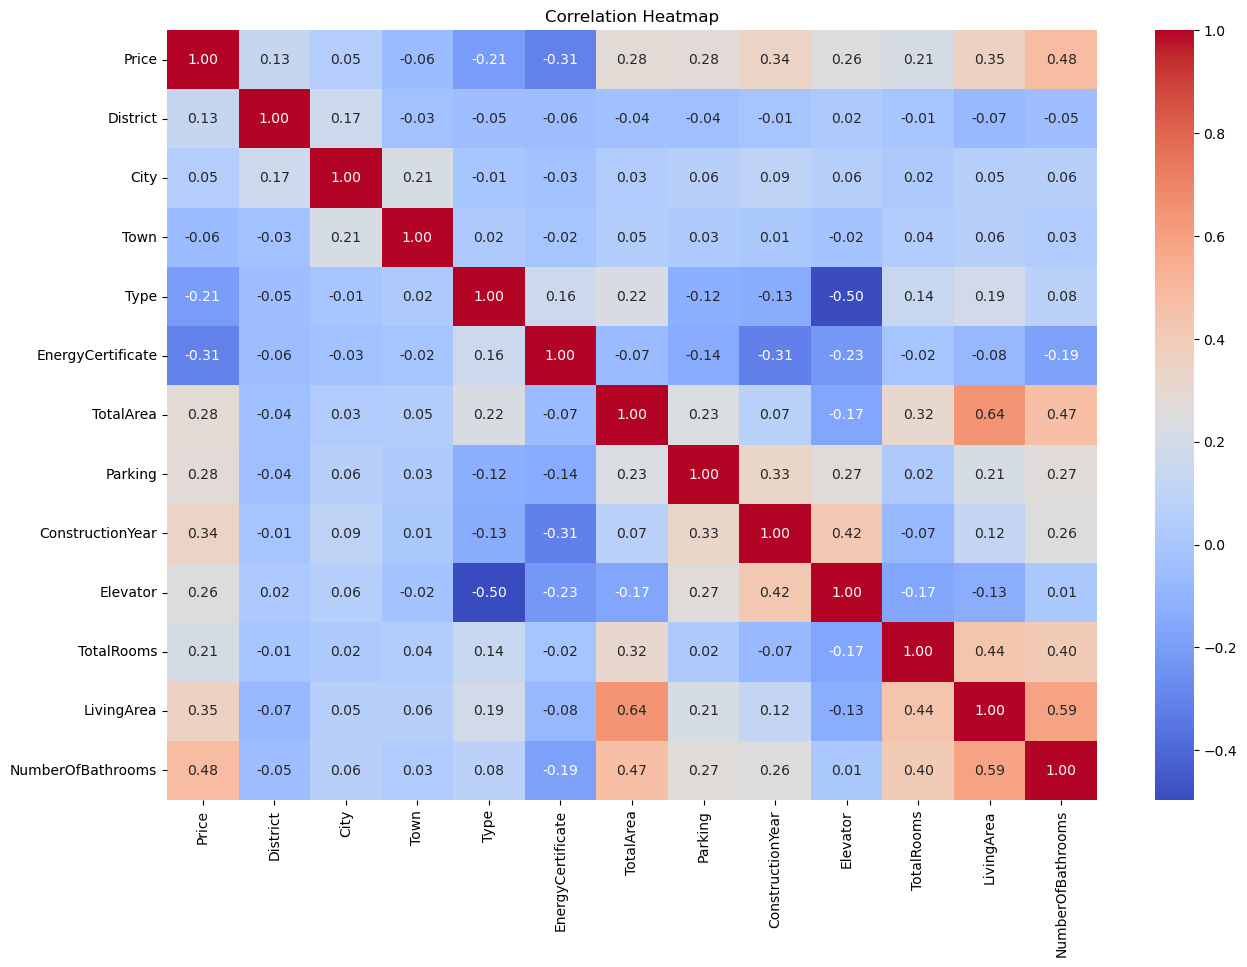

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_cleaned.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Mean Squared Error: 6519961688.27
R^2 Score: 0.81


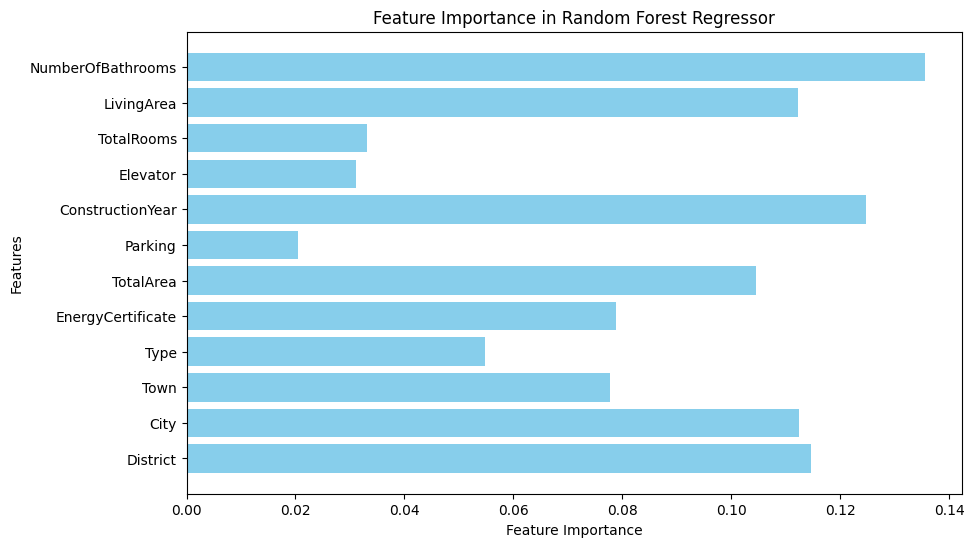

In [26]:
X = df_cleaned.drop(["Price"],axis=1)
y = df_cleaned['Price']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(max_depth=30,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=300, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Feature Importance Visualization
importances = rf.feature_importances_
feature_names = X.columns

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest Regressor')
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100, 200,300],        # Number of trees in the forest
    'max_depth': [5, 10, 20, 30],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Setting up the GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Optimization metric
    n_jobs=-1,  # Use all available cores
    verbose=2  # Output progress
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Best hyperparameters and corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Metrics for the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Model Mean Squared Error:", mse)
print("Best Model R2 Score:", r2)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Hyperparameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Model Mean Squared Error: 6519961688.266896
Best Model R2 Score: 0.8088812056914754


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Improved Feedforward Neural Network Model
model = Sequential([
    # First dense layer with 128 units and ReLU activation
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),
    
    # Second dense layer with 64 units and ReLU activation
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    # Third dense layer with 32 units and ReLU activation
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    # Fully connected layer to combine features
    Dense(16, activation='relu'),
    Dropout(0.2),
    
    # Output layer: predicting house price (regression task)
    Dense(1)  # No activation function here for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Epoch 1/50
1189/1189 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 115069263872.0000 - val_loss: 111750438912.0000
Epoch 2/50
1189/1189 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 109191962624.0000 - val_loss: 93449756672.0000
Epoch 3/50
1189/1189 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 85388034048.0000 - val_loss: 56275120128.0000
Epoch 4/50
1189/1189 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 54686101504.0000 - val_loss: 27446085632.0000
Epoch 5/50
1189/1189 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 34036369408.0000 - val_loss: 23818098688.0000
Epoch 6/50
1189/1189 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 26783744000.0000 - val_loss: 40033288192.0000
Epoch 7/50
1189/1189 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 25500809216.0000 - val_loss: 20141699072.0000
Epoch 8/50
1189/1189 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 24875227136.0000 - val_loss: 19701088256.0000
Epoch 9/50
1189/1189 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 24305297408.0000 - val_loss: 23318697984.0000
Epoch 10/50
1189/1189 ━━━

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)  # Adjust max_depth as needed

# Fit the model to the training data
dt_regressor.fit(X_train, y_train)

# Make predictions
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
#plt.figure(figsize=(20, 10))
#plot_tree(dt_regressor, feature_names=X.columns, filled=True, rounded=True, fontsize=12)
#plt.title("Decision Tree Visualization", fontsize=16)
#plt.show()

Mean Squared Error: 18757119500.509212
R^2 Score: 0.45017498030864334


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate the Linear Regression model
lin_regressor = LinearRegression()

# Fit the model to the training data
lin_regressor.fit(X_train, y_train)

# Make predictions
y_pred = lin_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 20004892814.53337
R^2 Score: 0.4135991624206644
